## Matplotliib

* Scatter Plots & Line Plots 
* Histograms 

#### Import Data and Select Data to plot

In [1]:
import pandas as pd
df_pop = pd.read_csv('/home/docadmin/ZackC/Python Misc/Data/PpopulationData.csv', delimiter=',')
df_stats = pd.read_csv('/home/docadmin/ZackC/Python Misc/Data/WorldDebtData.csv', delimiter=',')

#subset pandas to only include non empty info 
df_stats_subset = df_stats[df_stats['2017Q2'].notnull() & (df_stats['2005Q4'].notnull())]

#rename column from population dataset you want to join on so they are named the same in each dataset 
df_pop=df_pop.rename(columns = {'Country ':'Country Code'})

#select the first 4 columns of the population dataset 
df_pop_subset = df_pop.iloc[:,[0,1,3]]

#Merge population and population debt statistics into a single dataframe based on country code 
PopAndStats = pd.merge(df_stats_subset, df_pop_subset, how='left', on='Country Code', sort=True)

#convert Total Population to Numeric (must remove commas before conversion)
PopAndStats["TotalPop(Thousands)"] = PopAndStats["TotalPop(Thousands)"].str.replace(",", "").astype(float)


#### Identify groups of variables by data type 

In [7]:
#group columns in dataset by there data type 
g = PopAndStats.columns.to_series().groupby(PopAndStats.dtypes).groups

#list of variables by type 
{k.name: v for k, v in g.items()}

#select subset of columns by there datatype 
Numerics = list(PopAndStats.select_dtypes(include=['float64','int64']).columns)
Categorics = list(PopAndStats.select_dtypes(include=['object']).columns)

print('Numeric Columns:',list(Numerics))
print('Categoric Columns:',list(Categorics))

print(set(pd.to_numeric(PopAndStats['TotalPop(Thousands)'])))

('Numeric Columns:', ['1998Q1', '1998Q2', '1998Q3', '1998Q4', '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3', '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', 'TotalPop(Thousands)'])
('Categoric Columns:', ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Ranking'])
set([68864.0, 16385.0, 17797.0, 46444.0, 11403.0, 48653.0, 2065.0, 126

#### 2D Line and Scatter Plots 

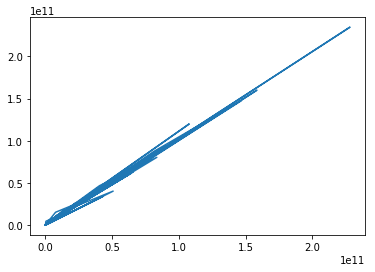

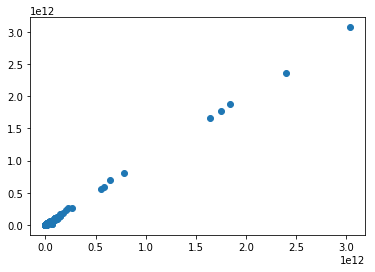

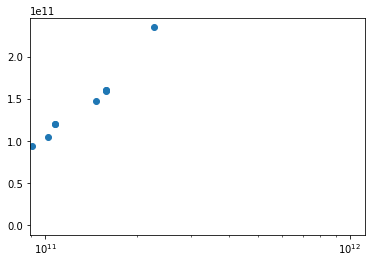

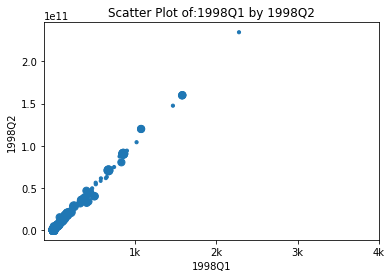

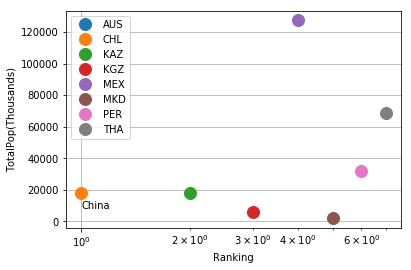

In [128]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
#from pandas.tools import plotting._get_standard_colors
#Note: if you provide multiple plots without calling plt.show() , they are overlayed on each other when displayed 

#Line Plot: year on the x-axis, pop on the y-axis
plt.plot(PopAndStats[Numerics[0]],PopAndStats[Numerics[1]])
plt.show()

#Scatter Plot 
plt.scatter(PopAndStats[Numerics[4]],PopAndStats[Numerics[7]])
plt.show()

#Scatter Plot is log x axis 
plt.scatter(PopAndStats[Numerics[0]],PopAndStats[Numerics[1]])
plt.xscale('log')
plt.show()

#Scatter split with log(x) axis and labels and title and x-axis intervals and labels
plt.scatter(PopAndStats[Numerics[0]],PopAndStats[Numerics[1]], s=PopAndStats['TotalPop(Thousands)']/1000)
plt.xlabel(str(Numerics[0]))
plt.ylabel(str(Numerics[1]))
plt.title(str('Scatter Plot of')+':'+str(Numerics[0])+' by '+str(Numerics[1]))
tick_vals = [100000000000,200000000000,300000000000,400000000000]
tick_labs = ['1k','2k','3k','4k']
plt.xticks(tick_vals,tick_labs)
plt.show()
          

#Scatter split with log(x) axis and labels and title and x-axis intervals and labels and size of dot representing population of country 
#identify variable you want to use in defining color labels
IndicatorCode ='DT.DOD.DLXF.PR.DS.US'
Datasub = PopAndStats[PopAndStats['Indicator Code']==IndicatorCode]
groups = Datasub.groupby('Country Code')
#names of groupbydataframe columns 
GroupColNames = groups.obj.columns



# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[GroupColNames[82]], group[GroupColNames[83]], marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xscale('log')
plt.xlabel(str(GroupColNames[82]))
plt.ylabel(str(GroupColNames[83]))
plt.grid(True) #show grid lines
plt.text(1, 8000, 'China') #add text label
plt.show()


In [106]:
#groups.obj.columns
list(groups['Indicator Code'])
Datasub
GroupColNames

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1998Q1', u'1998Q2', u'1998Q3', u'1998Q4', u'1999Q1', u'1999Q2',
       u'1999Q3', u'1999Q4', u'2000Q1', u'2000Q2', u'2000Q3', u'2000Q4',
       u'2001Q1', u'2001Q2', u'2001Q3', u'2001Q4', u'2002Q1', u'2002Q2',
       u'2002Q3', u'2002Q4', u'2003Q1', u'2003Q2', u'2003Q3', u'2003Q4',
       u'2004Q1', u'2004Q2', u'2004Q3', u'2004Q4', u'2005Q1', u'2005Q2',
       u'2005Q3', u'2005Q4', u'2006Q1', u'2006Q2', u'2006Q3', u'2006Q4',
       u'2007Q1', u'2007Q2', u'2007Q3', u'2007Q4', u'2008Q1', u'2008Q2',
       u'2008Q3', u'2008Q4', u'2009Q1', u'2009Q2', u'2009Q3', u'2009Q4',
       u'2010Q1', u'2010Q2', u'2010Q3', u'2010Q4', u'2011Q1', u'2011Q2',
       u'2011Q3', u'2011Q4', u'2012Q1', u'2012Q2', u'2012Q3', u'2012Q4',
       u'2013Q1', u'2013Q2', u'2013Q3', u'2013Q4', u'2014Q1', u'2014Q2',
       u'2014Q3', u'2014Q4', u'2015Q1', u'2015Q2', u'2015Q3', u'2015Q4',
       u'2016Q1', u'2016Q2', u'2016Q3', u'201

In [ ]:
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cval in PopAndStats["Country Code"]:
    colors.update({cval : cmap(norm(cval))})

#create a figure
fig = plt.figure(figsize=(5,2.8))

#plot the swarmplot with the colors dictionary as palette
m = sns.swarmplot(x='Key', y = 'a',  hue="c", s=20, data = df, palette = colors)
# remove the legend, because we want to set a colorbar instead
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Some Units')
plt.show()

#### Histograms

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency 

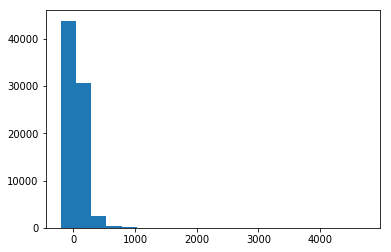

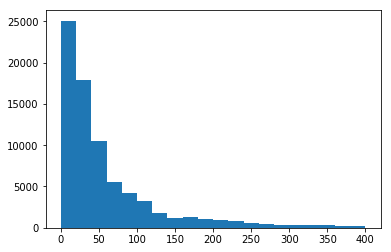

In [75]:
import matplotlib.pyplot as plt 
help(plt.hist)

#data to plot 
mylist = list(df.select_dtypes(include=['float']).columns)

#basic histogram 
plt.hist(df[mylist[1]], bins=20)
plt.show()
plt.clf() #cleans up plt so you can start afresh.

#histogram with range defined for x axis 
plt.hist(df[mylist[1]], bins=20, range=(0,400))
plt.show()
plt.clf() 

